# Imports

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Selection of categories

In [2]:
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

In [3]:
data_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42
)

In [4]:
data_test = fetch_20newsgroups(
    subset="test",
    categories=categories,
    shuffle=True,
    random_state=42
)

In [8]:
data_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [12]:
len(data_test['data'])

1353

In [13]:
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

In [14]:
# split target in a training set and a test set
y_train, y_test = data_train.target, data_test.target

In [15]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
)

In [16]:
X_train = vectorizer.fit_transform(data_train.data)

In [18]:
X_test = vectorizer.transform(data_test.data)

In [19]:
feature_names = vectorizer.get_feature_names_out()

In [21]:
feature_names.shape

(7831,)

In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=5, max_iter=1000)

In [23]:
classifier.fit(X_train, y_train)

In [24]:
pred = classifier.predict(X_test)

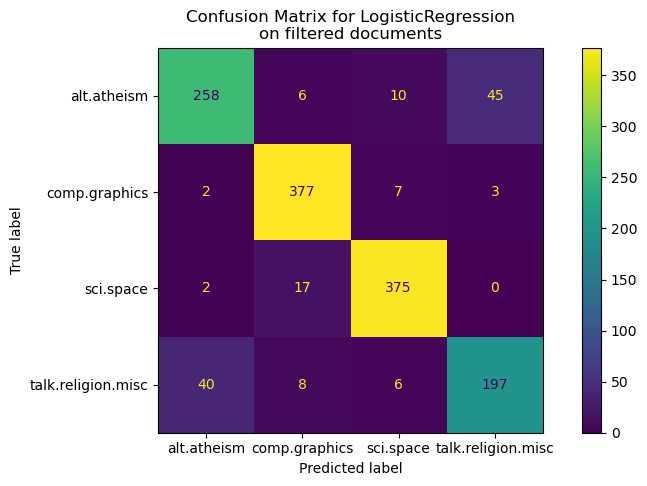

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {classifier.__class__.__name__}\non filtered documents"
)

In [26]:
from sklearn import metrics

def benchmark(classifier_algorithm):
    classifier_algorithm.fit(X_train, y_train)
    pred = classifier_algorithm.predict(X_test)

    score = metrics.accuracy_score(y_test, pred)
    precision_score = metrics.precision_score(y_test, pred, average=None)
    recall_score = metrics.recall_score(y_test, pred, average=None)
    f1_score = metrics.f1_score(y_test, pred, average=None)

    clf_descr = classifier_algorithm.__class__.__name__
    return clf_descr, score, precision_score, recall_score, f1_score

In [27]:
benchmark(classifier)

('LogisticRegression',
 0.8920916481892092,
 array([0.85430464, 0.92401961, 0.94221106, 0.80408163]),
 array([0.80877743, 0.96915167, 0.95177665, 0.78486056]),
 array([0.83091787, 0.94604768, 0.9469697 , 0.79435484]))